# Esercitazione 4

## Esercizio 04.1

Vogliamo simulare il comportamento di un sistema descritto da un potenziale di Lennard-Jones utilizzando un codice di dinamica molecolare.

Per prima cosa abbiamo implementato la possibilità di far ripartire la simulazione dall'ultima configurazione della simulazione precedente.

Per permettere alla simulazione di ripartire aggiungiamo ai file di input una riga dove scriviamo la variabile restart che viene letta in fase di inizializzazione e dice al codice se far partire la simulazione da una configurazione iniziale determinata esternamente (un reticolo FCC) o se  ripartire dalle ultime configurazioni della simulazione precedente.

Al termine di ogni simulazione quindi vengono salvate le ultime due configurazioni raggiunte in modo che sia possibile far partire una nuova simulazione usando l'algoritmo di Verlet.

Abbiamo inoltre aggiunto un fattore di riscalamento delle velocità $f_s$ per renderle coerenti con la temperatura desiderata. Questo fattore è stato calcolato imponendo che la temperatura misurata $T$ sia uguale alla temperatura $T^*$che vogliamo simulare: 

$$
T = \frac{\sum_i |\vec{v_i}|^2}{3N} = T^* = \frac{\sum_i (|\vec{v_i}|f_s)^2}{3N}
$$

da cui: 

$$
f_s = \sqrt{\frac{3NT^*}{\sum_i |\vec{v_i}|^2}}
$$

Simuliamo un solido a una temperatura $T=1.4$ (in unità di Lennard-Jones) e riportiamo i grafici della temperatura e dell'energia cinetica per particella in funzione del numero di passi Monte Carlo effettuati

Per ogni simulazione effettuiamo $10^4$ steps Monte Carlo e misuriamo le proprietà del sistema ogni 10 passi.

Riportiamo i valori di temperatura misurati nel corso di più simulazioni e il fattore di scala per mostrare il processo di equilibrazione. 

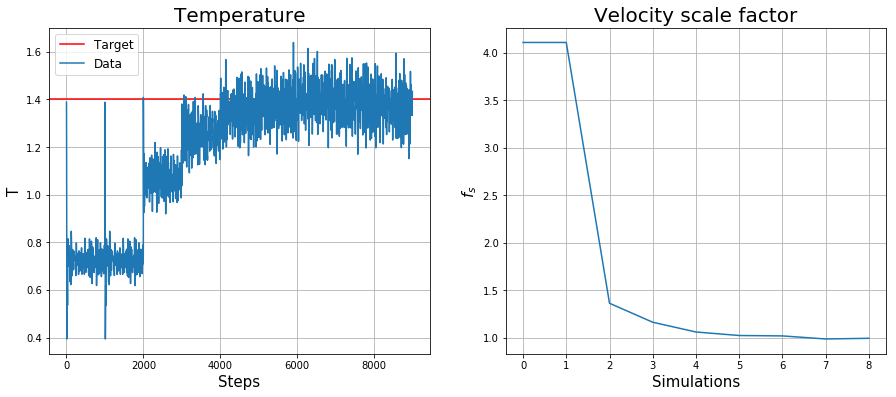

In [94]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

T = np.genfromtxt("Esercizio_04.1/output_temp.dat")          #import data from file
f = np.genfromtxt("Esercizio_04.1/scale.dat")          #import data from file
x = np.arange(len(T))                                       #generate the x values

fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=[15,6])  #plots
ax = axs[0]
ax.errorbar(x, T, label = 'Data')
ax.axhline(y=1.4, color = 'red',label = 'Target')
ax.set_title('Temperature', fontsize = 20)
ax.set_xlabel('Steps', fontsize=15)
ax.set_ylabel('T', fontsize=15)  
ax.grid()
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(f)
ax.set_title('Velocity scale factor', fontsize = 20)
ax.set_ylabel('$f_s$', fontsize=15)
ax.set_xlabel('Simulations', fontsize=15)  
ax.grid()

plt.show()

Per le prime due simulazioni (primi 2000 punti) non abbiamo fatto ripartire la simulazione dalle configurazioni precedenti e infatti i valori misurati non corrispondono a quelli desiderati e non si ha nessuna evoluzione verso la temperatura ed energia cinetica target. A partire dalla terza simulazione abbiamo iniziato a equilibrare il sistema andando a far ripartire ogni simulazione dal punto di arrivo della simulazione precedente e possiamo osservare che i valori di temperatura trovati si avvicinano a quello desiderato e contemporaneamente il fattore di scala tende ad 1. Questo conferma che il processo è stato equilibrato con successo.

## Esercizio 04.2

Implementiamo il calcolo della medie e delle incertezze delle quantità che ci interessano calcolandole tramite la media a blocchi.

Per farlo leggiamo dai file di output tutti i valori di temperatura, energia cinetica, energia potenziale ed energia totale generati fino a quel punto e su di essi applichiamo una media a blocchi dividendo i $10^4$ steps della simulazione in 100 blocchi. 

Come in precedenza simuliamo un solido di Lennard Jones a $T = 1.4$ per vedere i risultati ottenuti con le nostre medie.

Riportiamo quindi l'andamento dei valori mediati di temperatura, energia cinetica, energia potenziale ed energia totale per particella con la relativa incertezza su un sistema precedentemente equilibrato.

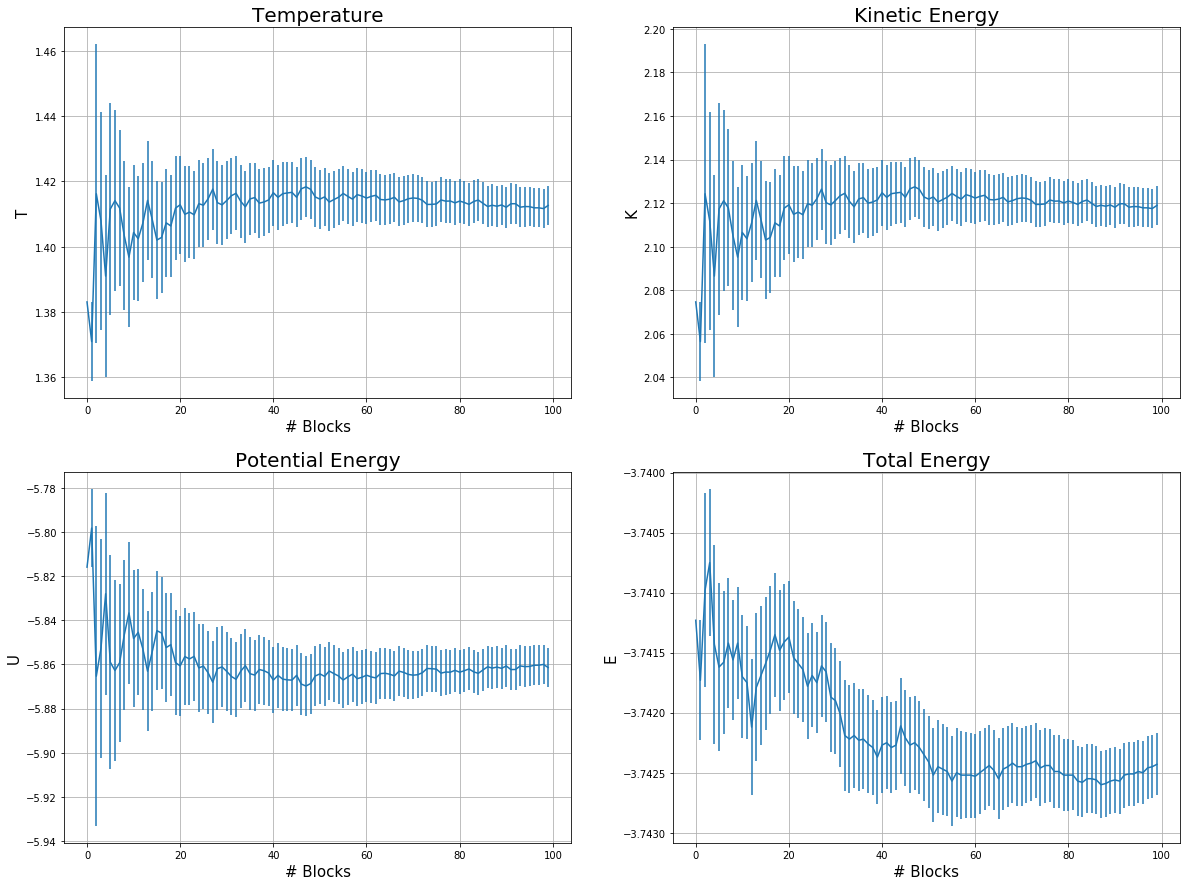

In [123]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

data_T = np.genfromtxt("Esercizio_04.2/ave_temp.out")          #import data from file
data_ekin = np.genfromtxt("Esercizio_04.2/ave_ekin.out")       #import data from file
data_epot = np.genfromtxt("Esercizio_04.2/ave_epot.out")       #import data from file
data_etot = np.genfromtxt("Esercizio_04.2/ave_etot.out")       #import data from file


T = data_T [:,0]
T_err = data_T [:,1] 
K = data_ekin [:,0]
K_err = data_ekin [:,1] 
U = data_epot [:,0]
U_err = data_epot [:,1] 
E = data_etot [:,0]
E_err = data_etot [:,1] 

x = np.arange(len(T))                                       #generate the x values

fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=[20,15])  #plots
ax = axs[0,0]
ax.errorbar(x, T, yerr = T_err)
ax.set_title('Temperature', fontsize = 20)
ax.set_xlabel('# Blocks', fontsize=15)
ax.set_ylabel('T', fontsize=15)  
ax.grid()
ax = axs[0,1]
ax.errorbar(x, K, yerr = K_err)
ax.set_title('Kinetic Energy', fontsize = 20)
ax.set_xlabel('# Blocks', fontsize=15)
ax.set_ylabel('K', fontsize=15)  
ax.grid()
ax = axs[1,0]
ax.errorbar(x, U, yerr = U_err)
ax.set_title('Potential Energy', fontsize = 20)
ax.set_xlabel('# Blocks', fontsize=15)
ax.set_ylabel('U', fontsize=15)  
ax.grid()
ax = axs[1,1]
ax.errorbar(x, E, yerr = E_err)
ax.set_title('Total Energy', fontsize = 20)
ax.set_xlabel('# Blocks', fontsize=15)
ax.set_ylabel('E', fontsize=15)  
ax.grid()

plt.show()

## Esercizio 04.3

Utilizziamo ora il nostro codice per simulare tramite un modello Lennard-Jones un sistema composto da Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nei seguenti casi:
1. solido:  $\rho^\star = 1.1$, $T^\star = 0.8$ ($r_c = 2.2$)
2. liquido:  $\rho^\star = 0.8$, $T^\star = 1.1$ ($r_c = 2.5$)
3. gas:  $\rho^\star = 0.05$, $T^\star = 1.2$ ($r_c = 5.0$)

Riportiamo i valori medi di temperatura, energia cinetica per particella, energia potenziale per particella ed energia totale per particella in unità del sistema internazionale dopo che il sistema è stato equilibrato.

Per passare da unità di Lennard-Jones a unità del sistema internazionale abbiamo usato le seguenti espressioni:
- $T = \frac{\epsilon}{k_B}T^* = 120 K \times T^*$
- $E = \epsilon E^* = 120 K \times k_B \times E^*$

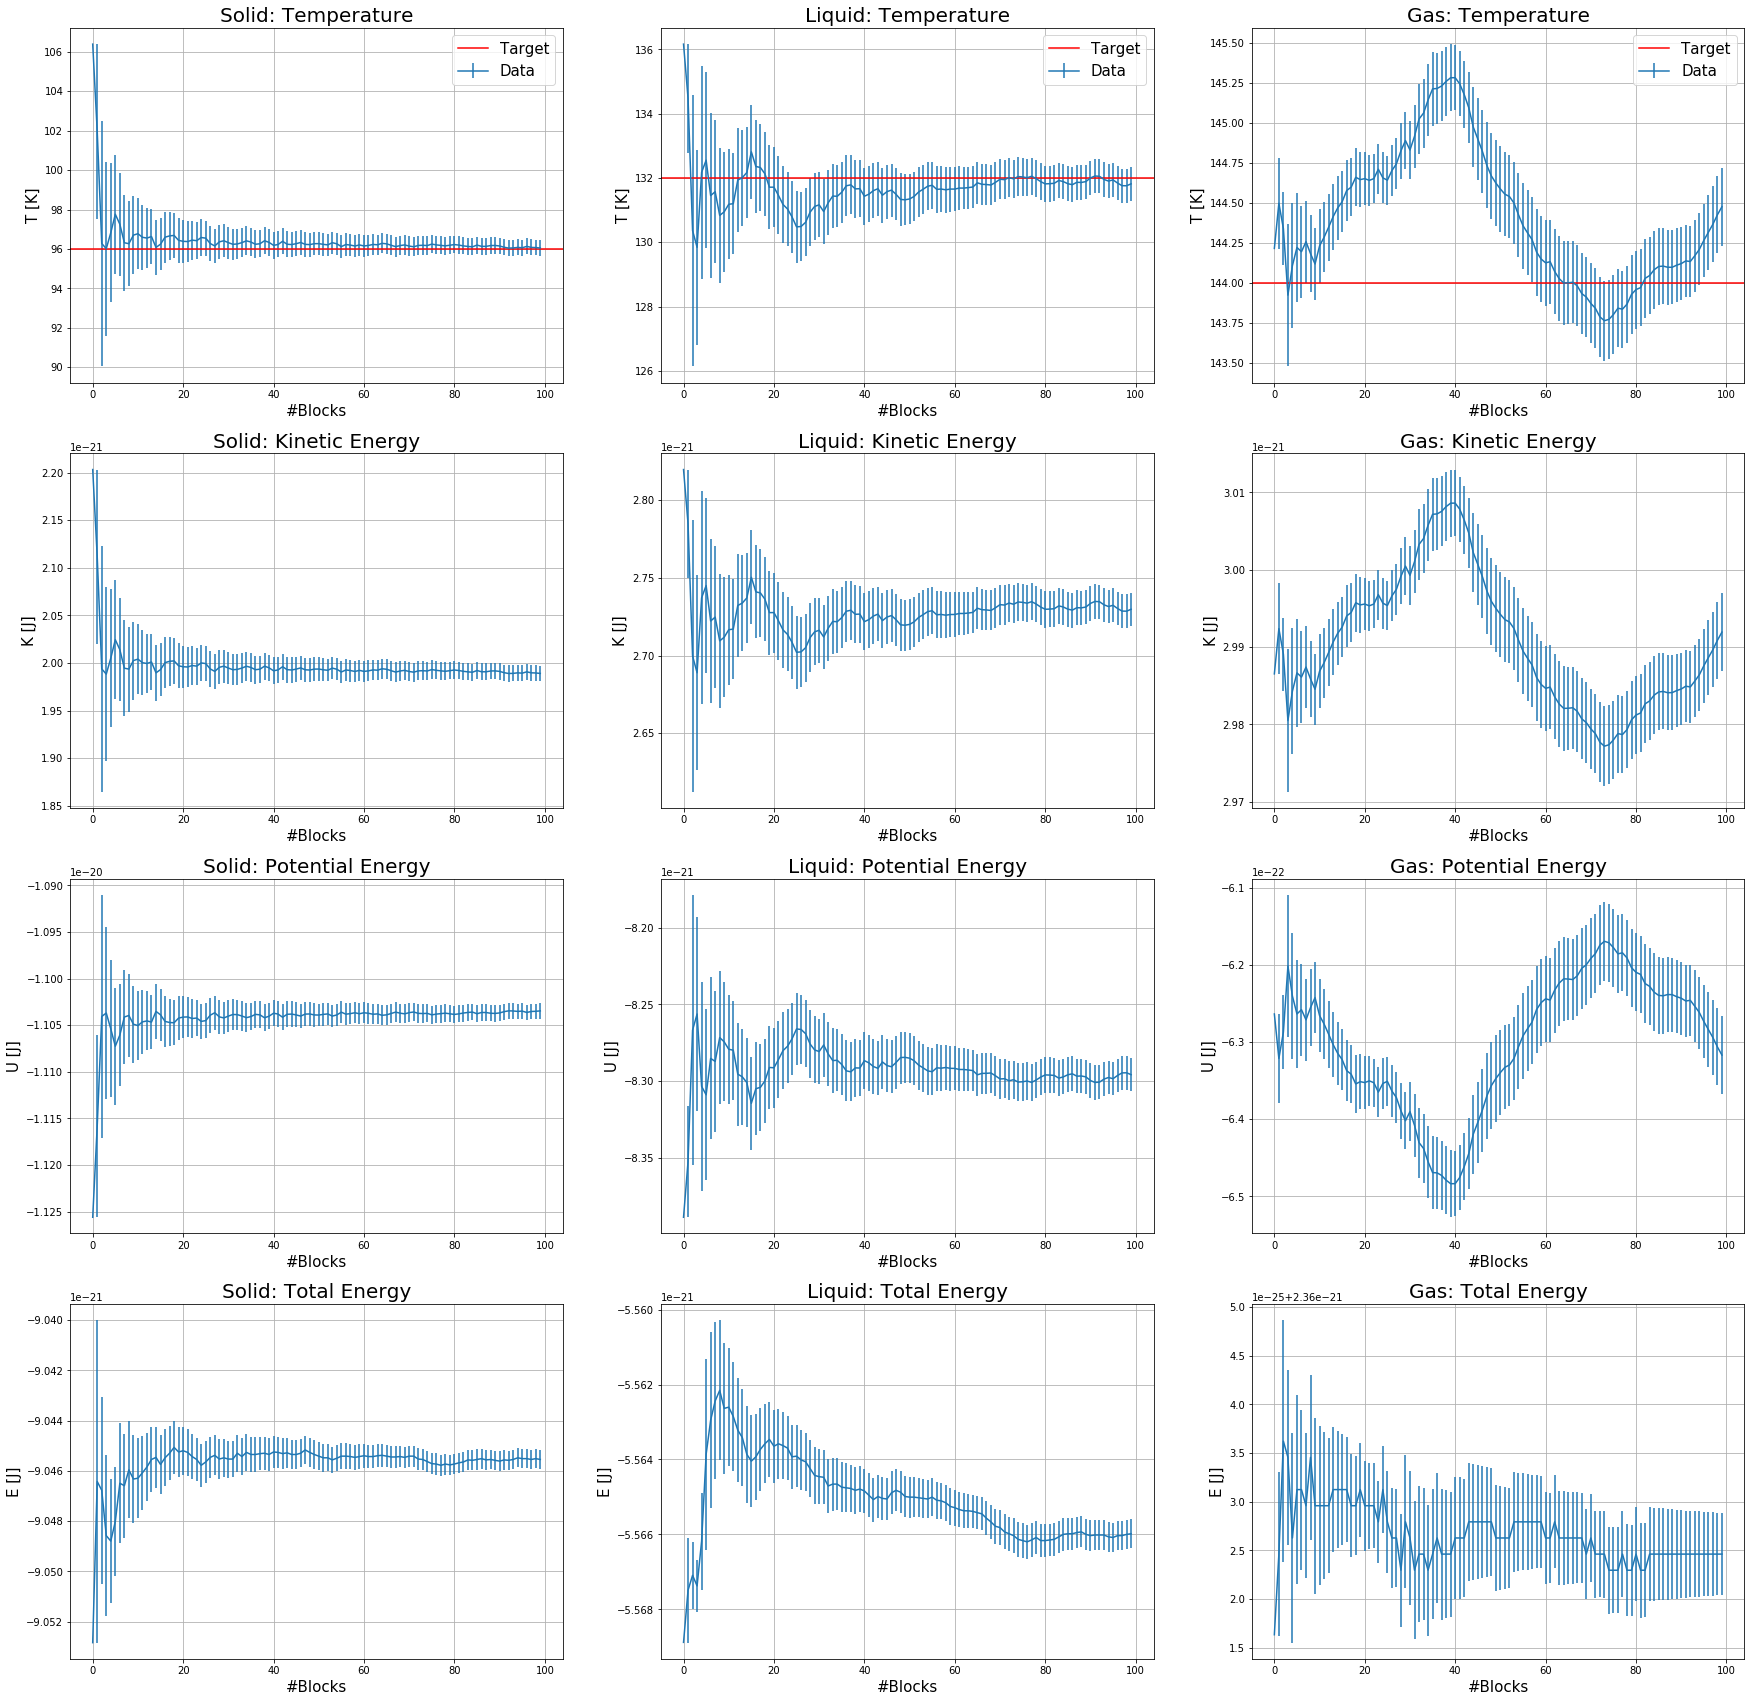

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

T_s = np.genfromtxt("Esercizio_04.3/Solido/ave_temp.out")          #import data from file
T_l = np.genfromtxt("Esercizio_04.3/Liquido/ave_temp.out")         #import data from file
T_g = np.genfromtxt("Esercizio_04.3/Gas/ave_temp.out")             #import data from file

T_s = T_s*120                                                    #convert to SI units
T_l = T_l*120                                                    #convert to SI units
T_g = T_g*120                                                    #convert to SI units

K_s = np.genfromtxt("Esercizio_04.3/Solido/ave_ekin.out")          #import data from file
K_l = np.genfromtxt("Esercizio_04.3/Liquido/ave_ekin.out")         #import data from file
K_g = np.genfromtxt("Esercizio_04.3/Gas/ave_ekin.out")

K_s = K_s * 120*1.3806*10**(-23);
K_l = K_l * 120*1.3806*10**(-23);
K_g = K_g * 120*1.3806*10**(-23);

U_s = np.genfromtxt("Esercizio_04.3/Solido/ave_epot.out")          #import data from file
U_l = np.genfromtxt("Esercizio_04.3/Liquido/ave_epot.out")         #import data from file
U_g = np.genfromtxt("Esercizio_04.3/Gas/ave_epot.out")             #import data from file

U_s = U_s * 120*1.3806*10**(-23);
U_l = U_l * 120*1.3806*10**(-23);
U_g = U_g * 120*1.3806*10**(-23);

E_s = np.genfromtxt("Esercizio_04.3/Solido/ave_etot.out")          #import data from file
E_l = np.genfromtxt("Esercizio_04.3/Liquido/ave_etot.out")          #import data from file
E_g = np.genfromtxt("Esercizio_04.3/Gas/ave_etot.out")

E_s = E_s * 120*1.3806*10**(-23);
E_l = E_l * 120*1.3806*10**(-23);
E_g = E_g * 120*1.3806*10**(-23);

x_s = np.arange(len(T_s[:,0]))                                       #generate the x values
x_l = np.arange(len(T_l[:,0]))                                       #generate the x values
x_g = np.arange(len(T_g[:,0]))                                       #generate the x values

fig, axs = plt.subplots(nrows = 4, ncols=3, figsize=[30,30])  #plots
ax = axs[0,0]
ax.errorbar(x_s, T_s[:,0], yerr = T_s[:,1], label = 'Data')
ax.set_title('Solid: Temperature', fontsize = 20)
ax.axhline(y=0.8*120, color = 'red', label = 'Target')
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('T [K]', fontsize=15)
ax.legend(fontsize = 15)
ax.grid()
ax = axs[0,1]
ax.errorbar(x_l, T_l[:,0], yerr = T_l[:,1], label = 'Data')
ax.set_title('Liquid: Temperature', fontsize = 20)
ax.axhline(y=1.1*120, color = 'red', label = 'Target')
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('T [K]', fontsize=15)  
ax.legend(fontsize = 15)
ax.grid()
ax = axs[0,2]
ax.errorbar(x_g, T_g[:,0], yerr = T_g[:,1], label = 'Data')
ax.set_title('Gas: Temperature', fontsize = 20)
ax.axhline(y=1.2*120, color = 'red', label = 'Target')
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('T [K]', fontsize=15)  
ax.legend(fontsize = 15)
ax.grid()

ax = axs[1,0]
ax.errorbar(x_s, K_s[:,0], yerr = K_s[:,1])
ax.set_title('Solid: Kinetic Energy', fontsize = 20)
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('K [J]', fontsize=15)  
ax.grid()
ax = axs[1,1]
ax.errorbar(x_l, K_l[:,0], yerr = K_l[:,1])
ax.set_title('Liquid: Kinetic Energy', fontsize = 20)
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('K [J]', fontsize=15)  
ax.grid()
ax = axs[1,2]
ax.errorbar(x_g, K_g[:,0], yerr = K_g[:,1])
ax.set_title('Gas: Kinetic Energy', fontsize = 20)
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('K [J]', fontsize=15)  
ax.grid()

ax = axs[2,0]
ax.errorbar(x_s, U_s[:,0], yerr = U_s[:,1])
ax.set_title('Solid: Potential Energy', fontsize = 20)
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('U [J]', fontsize=15)  
ax.grid()
ax = axs[2,1]
ax.errorbar(x_l, U_l[:,0], yerr = U_l[:,1])
ax.set_title('Liquid: Potential Energy', fontsize = 20)
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('U [J]', fontsize=15)  
ax.grid()
ax = axs[2,2]
ax.errorbar(x_g, U_g[:,0], yerr = U_g[:,1])
ax.set_title('Gas: Potential Energy', fontsize = 20)
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('U [J]', fontsize=15)  
ax.grid()

ax = axs[3,0]
ax.errorbar(x_s, E_s[:,0], yerr = E_s[:,1])
ax.set_title('Solid: Total Energy', fontsize = 20)
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('E [J]', fontsize=15)  
ax.grid()
ax = axs[3,1]
ax.errorbar(x_l, E_l[:,0], yerr = E_l[:,1])
ax.set_title('Liquid: Total Energy', fontsize = 20)
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('E [J]', fontsize=15)  
ax.grid()
ax = axs[3,2]
ax.errorbar(x_g, E_g[:,0], yerr = E_g[:,1])
ax.set_title('Gas: Total Energy', fontsize = 20)
ax.set_xlabel('#Blocks', fontsize=15)
ax.set_ylabel('E [J]', fontsize=15)  
ax.grid()

plt.show()

I risultati trovati sono coerenti con quanto ci aspettiamo dal momento che troviamo $ \langle E \rangle_{solid} < \langle E \rangle_{liquid} < \langle E \rangle_{gas}$.

Osserviamo che la fase gassosa è stata la più difficile da equilibrare, per equilibrarla infatti abbiamo dovuto fare una prima simulazione a una temperatura inferiore ($T^* = 1$) e poi successivamente alzare la temperatura di input a $T^* = 1.2$. Anche facendo in questo modo la temperatura del gas sembra essere decisamente più instabile di quella delle altre fasi.